We set up advection over $[0,1]$ with velocity $c=-1$. This puts the right-side boundary in the upwind direction.

In [1]:
include("../FNC.jl")
n = 100
x,Dx = FNC.diffmat2(n,[0 1])
uinit = @. exp(-80*(x-0.5)^2);

First we try imposing $u=0$ at the right boundary, by appending that value to the end of the vector before multiplying by the differentiation matrix.

In [2]:
chop(u) = u[1:n];  extend(v) = [v;0];
ode(v,c,t) = -c*chop(Dx*extend(v));

using DifferentialEquations
IVP = ODEProblem(ode,uinit[1:n],(0.,1.),-1)
sol = solve(IVP,RK4());

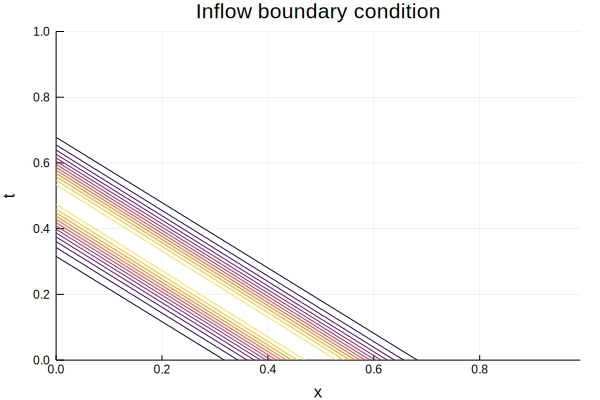

In [3]:
using Plots
plot(x[1:n],sol.t,sol[:,:]',
    xlabel="x",ylabel="t",title="Inflow boundary condition",leg=:none)

The data from the initial condition propagates out of the left edge. Because only zero is coming in from the upwind direction, the solution remains zero thereafter.

Now we try $u=0$ imposed at the left boundary. 

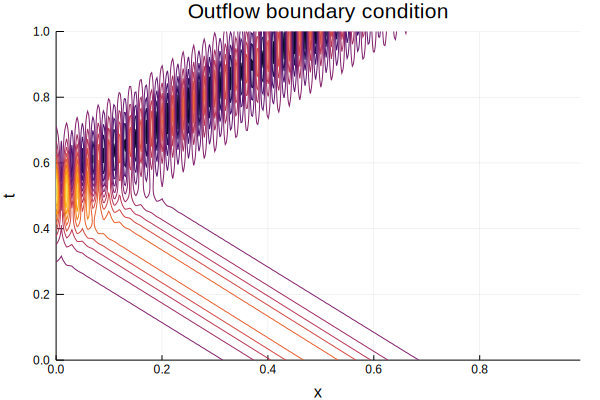

In [4]:
chop(u) = u[2:n+1];  extend(v) = [0;v];
sol = solve(IVP,RK4());
plot(x[1:n],sol.t,sol[:,:]',
    xlabel="x",ylabel="t",title="Outflow boundary condition",leg=:none)

Everything seems OK until the data begins to interact with the inappropriate boundary condition. The resulting "reflection" is entirely wrong for advection from right to left. 